In [1]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import BayesianRidge

from gp_lite import *

seaborn.set(style='ticks')
saving_figs = False

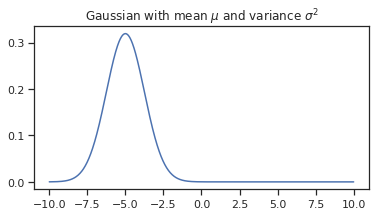

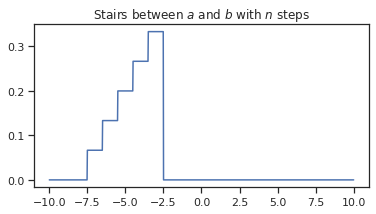

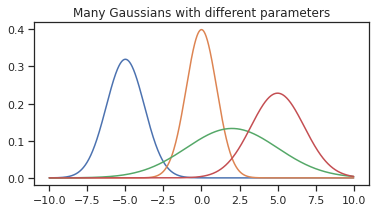

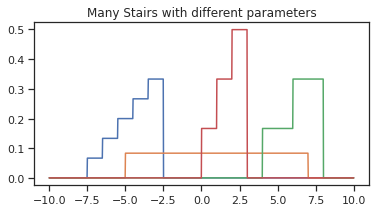

In [2]:
def parabola(t,c,w):
    return (t-c)**2/w**2


def gaussian(t,mu,sigma):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(t-mu)**2/2/sigma**2)

def ones(t,a,b):
    return np.heaviside(t-a,1)-np.heaviside(t-b,1)

def stairs(t,a,b,n=1):
    jumps = np.linspace(a,b,n+1)
    stairs = np.zeros_like(t)
    
    for j in jumps: 
        stairs += ones(t,j,b)
    
    return stairs/(np.sum(stairs)*(t[1]-t[0]))

t = np.linspace(-10,10,1000)


plt.figure(figsize=(6,3))
plt.plot(t,gaussian(t,-5,1.25))
plt.title('Gaussian with mean $\mu$ and variance $\sigma^2$')
if saving_figs:
        plt.savefig(f'param_model_gaussians1.pdf',bbox_inches='tight',pad_inches=0)

plt.figure(figsize=(6,3))
plt.plot(t,stairs(t,-7.5,-2.5,5))
plt.title('Stairs between $a$ and $b$ with $n$ steps')
if saving_figs:
        plt.savefig(f'param_model_stairs1.pdf',bbox_inches='tight',pad_inches=0)

plt.figure(figsize=(6,3))
plt.plot(t,gaussian(t,-5,1.25))
plt.plot(t,gaussian(t,0,1))
plt.plot(t,gaussian(t,2,3))
plt.plot(t,gaussian(t,5,1.75))
plt.title('Many Gaussians with different parameters')
if saving_figs:
        plt.savefig(f'param_model_gaussians2.pdf',bbox_inches='tight',pad_inches=0)

plt.figure(figsize=(6,3))
plt.plot(t,stairs(t,-7.5,-2.5,5))
plt.plot(t,stairs(t,-5,7))
plt.plot(t,stairs(t,4,8,2))
plt.plot(t,stairs(t,0,3,3))
plt.title('Many Stairs with different parameters')

if saving_figs:
        plt.savefig(f'param_model_stairs2.pdf',bbox_inches='tight',pad_inches=0)



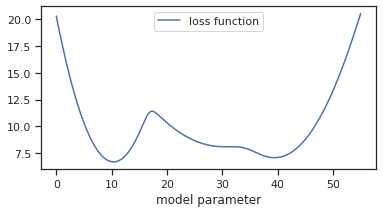

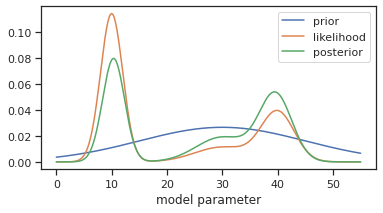

In [3]:
t = np.linspace(0,55,1000)
grid_step = t[1]-t[0]

prior = gaussian(t,30,15)
likelihood = (4*gaussian(t,10,2) + gaussian(t,30,5) + 2*gaussian(t,40,3))/7
posterior = prior*likelihood
posterior = posterior/np.sum(posterior*grid_step)

plt.figure(figsize=(6,3))
plt.plot(t, -np.log(prior) -np.log(likelihood), label = 'loss function')
plt.legend()
plt.xlabel('model parameter')
if saving_figs:
        plt.savefig(f'loss.pdf',bbox_inches='tight',pad_inches=0)

plt.figure(figsize=(6,3))
plt.plot(t, prior,label='prior')
plt.plot(t, likelihood, label='likelihood')
plt.plot(t, posterior, label = 'posterior')
plt.legend()
plt.xlabel('model parameter')
if saving_figs:
        plt.savefig(f'bayes0.pdf',bbox_inches='tight',pad_inches=0)




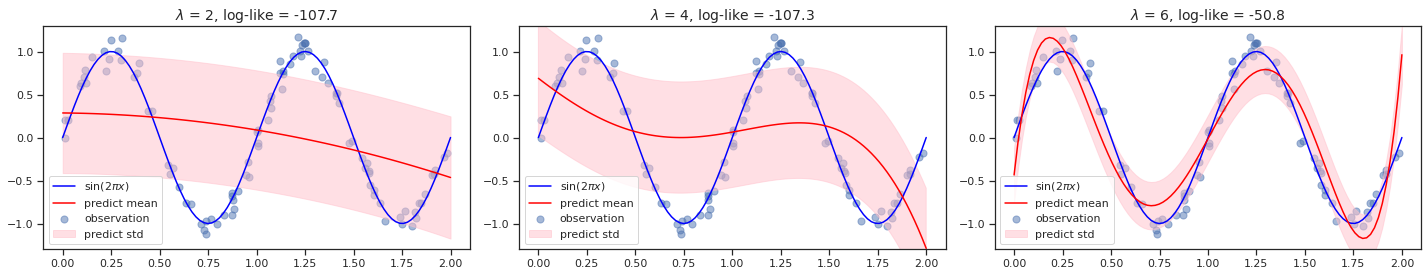

In [4]:
#modified from https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge_curvefit.html

def func(x): return np.sin(2*np.pi*x) + 0*ones(x,0.7,0.8)*(0.5-np.sin(2*np.pi*x))


# #############################################################################
# Generate sinusoidal data with noise
size = 100
rng = np.random.RandomState(1234)
x_train = rng.uniform(0., 2., size)
y_train = func(x_train) + rng.normal(scale=0.1, size=size)
x_test = np.linspace(0., 2., 100)




# #############################################################################
# Plot the true and predicted curves with log marginal likelihood (L)


orders = np.array([2,4,6])
reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
for i, ax in enumerate(axes):
   
        # #############################################################################
        # Fit by i-degree polynomial
        order = orders[i]
        X_train = np.vander(x_train, order + 1, increasing=True)
        X_test = np.vander(x_test, order + 1, increasing=True)


        reg.fit(X_train, y_train)
        ymean, ystd = reg.predict(X_test, return_std=True)

        ax.plot(x_test, func(x_test), color="blue", label="sin($2\\pi x$)")
        ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
        ax.plot(x_test, ymean, color="red", label="predict mean")
        ax.fill_between(x_test, ymean-ystd, ymean+ystd,
                        color="pink", alpha=0.5, label="predict std")
        ax.set_ylim(-1.3, 1.3)
        ax.legend(loc = 3)

        ax.set_title(f'$\lambda$ = {order}, log-like = {reg.scores_[-1]:.1f}', fontsize=14)


plt.tight_layout()

if saving_figs:
        plt.savefig(f'bayes_LR246.pdf',bbox_inches='tight',pad_inches=0)

        
        



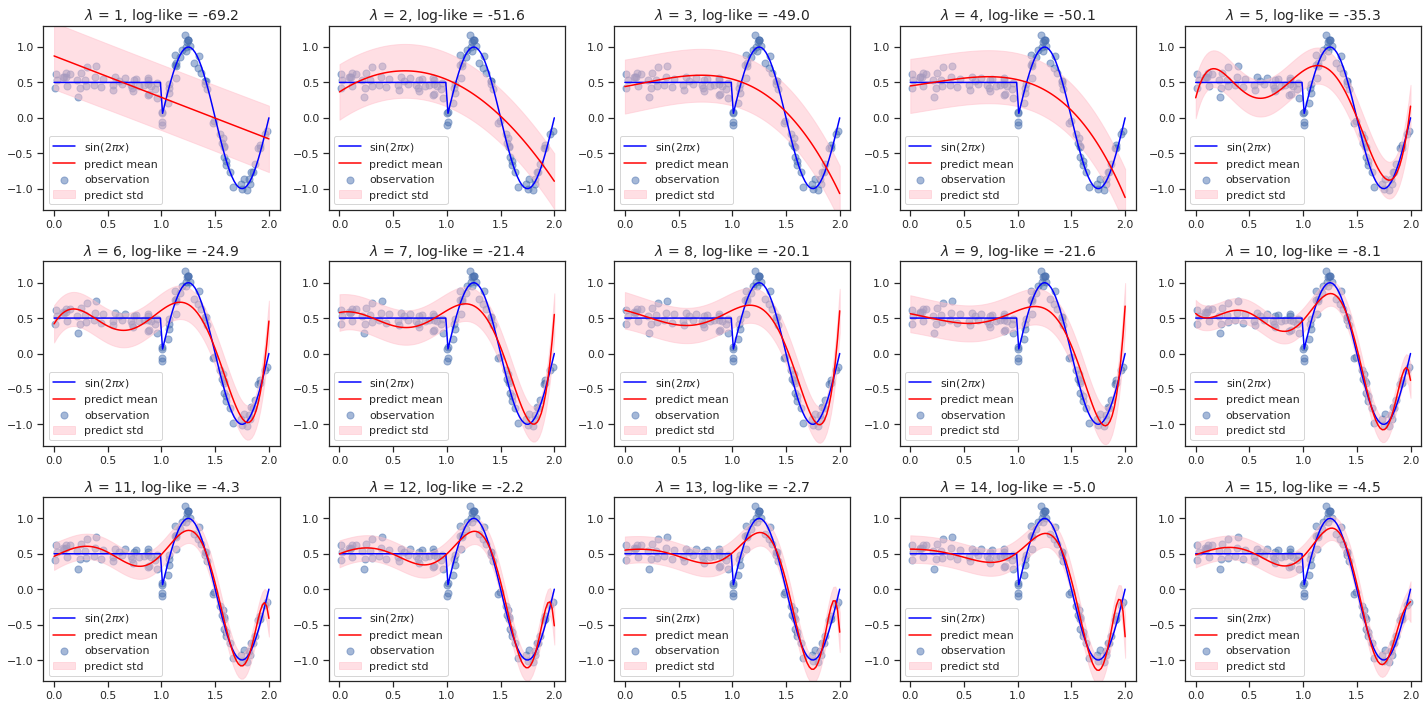

In [5]:
#modified from https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge_curvefit.html

def func(x): return np.sin(2*np.pi*x) + 1*ones(x,0,1)*(0.5-np.sin(2*np.pi*x))


# #############################################################################
# Generate sinusoidal data with noise
size = 100
rng = np.random.RandomState(1234)
x_train = rng.uniform(0., 2., size)
y_train = func(x_train) + rng.normal(scale=0.1, size=size)
x_test = np.linspace(0., 2., 100)




orders = np.arange(1,16)
reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes):
    for j in range(5):
        # #############################################################################
        # Fit by i-degree polynomial
        order = orders[i*5+j]
        X_train = np.vander(x_train, order + 1, increasing=True)
        X_test = np.vander(x_test, order + 1, increasing=True)


        reg.fit(X_train, y_train)
        ymean, ystd = reg.predict(X_test, return_std=True)

        ax[j].plot(x_test, func(x_test), color="blue", label="sin($2\\pi x$)")
        ax[j].scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
        ax[j].plot(x_test, ymean, color="red", label="predict mean")
        ax[j].fill_between(x_test, ymean-ystd, ymean+ystd,
                        color="pink", alpha=0.5, label="predict std")
        ax[j].set_ylim(-1.3, 1.3)
        ax[j].legend(loc = 3)

        ax[j].set_title(f'$\lambda$ = {order}, log-like = {reg.scores_[-1]:.1f}', fontsize=14)


plt.tight_layout()

if saving_figs:
        plt.savefig(f'bayes_LR1to15-const-sine.pdf',bbox_inches='tight',pad_inches=0)

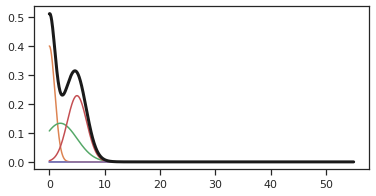

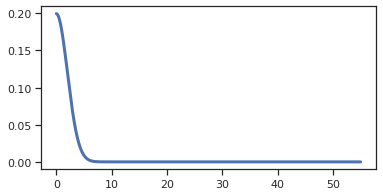

In [6]:
g1 = gaussian(t,-6,1.25)
g2 = gaussian(t,0,1)
g3 = gaussian(t,2,3)
g4 = gaussian(t,5,1.75)
g5 = gaussian(t,-4.5,0.75)
g = (g1+g2+g3+g4+g5)

plt.figure(figsize=(6,3))
plt.plot(t,g1)
plt.plot(t,g2)
plt.plot(t,g3)
plt.plot(t,g4)
plt.plot(t,g5)
plt.plot(t,g,'k', lw=3)
if saving_figs:
        plt.savefig(f'gauss_mix.pdf',bbox_inches='tight',pad_inches=0)
    
    
plt.figure(figsize=(6,3))
g0 = gaussian(t,0,2)
plt.plot(t,g0,lw=3)
if saving_figs:
        plt.savefig(f'gauss_single.pdf',bbox_inches='tight',pad_inches=0)
    
    

In [7]:
from matplotlib.patches import ConnectionPatch


def two_plots(ta,a,t1,x1,t2,x2, i):
    # ta, a: window
    # t1, x1: source signal
    # t2, x2: convolved signal
    # i: 
    
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,10))
    
    #plot the datapoints
    ax1.plot(t1, x1,'.', alpha = 0.35)
    for j in np.arange(0,len(t1),i):
        #plot triangles
        if j > 3500: 
            break
        ax1.fill_between(j+ta, 2*a/np.max(a),color='r', alpha = 0.25)
        
        
        
    # set the x-spine (see below for more info on `set_position`)
    ax1.spines['left'].set_position('zero')

    # turn off the right spine/ticks
    ax1.spines['right'].set_color('none')
    ax1.yaxis.tick_left()

    # set the y-spine
    ax1.spines['bottom'].set_position('zero')

    # turn off the top spine/ticks
    ax1.spines['top'].set_color('none')
    ax1.xaxis.tick_bottom()
    
    
    ax2.plot(t2, x2, 'o', c = 'purple')

    # set the x-spine (see below for more info on `set_position`)
    ax2.spines['left'].set_position('zero')

    # turn off the right spine/ticks
    ax2.spines['right'].set_color('none')
    ax2.yaxis.tick_left()

    # set the y-spine
    ax2.spines['bottom'].set_position('zero')

    # turn off the top spine/ticks
    ax2.spines['top'].set_color('none')
    ax2.xaxis.tick_bottom()
    ax1.set_title(f'{(500-i)/500*100}% overlapping')
    
    ax1.set_xlim([0, 4000])
    ax2.set_xlim([0, 4000])
    ax2.set_ylim([-2.75, 2.75])

    
    for j in range(len(t2)):
        
        xy_top = (t2[j],2)
        xy_bot = (t2[j],x2[j])
        con = ConnectionPatch(xyA=xy_top, xyB=xy_bot, coordsA="data", coordsB="data",
                      axesA=ax1, axesB=ax2, color="red", arrowstyle="-|>", fc="w", mutation_scale=20, alpha = 0.5)
        ax2.add_artist(con)

        
def two_plots_0(ta,a,t1,x1, i):
    #only data
    
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,10))
    
    #plot the datapoints
    ax1.plot(t1, x1,'.', alpha = 0.35)
            
        
    # set the x-spine (see below for more info on `set_position`)
    ax1.spines['left'].set_position('zero')

    # turn off the right spine/ticks
    ax1.spines['right'].set_color('none')
    ax1.yaxis.tick_left()

    # set the y-spine
    ax1.spines['bottom'].set_position('zero')

    # turn off the top spine/ticks
    ax1.spines['top'].set_color('none')
    ax1.xaxis.tick_bottom()
    
    

    # set the x-spine (see below for more info on `set_position`)
    ax2.spines['left'].set_position('zero')

    # turn off the right spine/ticks
    ax2.spines['right'].set_color('none')
    ax2.yaxis.tick_left()

    # set the y-spine
    ax2.spines['bottom'].set_position('zero')

    # turn off the top spine/ticks
    ax2.spines['top'].set_color('none')
    ax2.xaxis.tick_bottom()
    ax1.set_title(f'4000 realisations from an MVN')
    
    ax1.set_xlim([0, 4000])
    ax2.set_xlim([0, 4000])
    ax2.set_ylim([-2.75, 2.75])

    
def two_plots_1(ta,a,t1,x1, i):
    #only data + windows

    
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,10))
    
    #plot the datapoints
    ax1.plot(t1, x1,'.', alpha = 0.35)
    for j in np.arange(0,len(t1),i):
        #plot triangles
        if j > 3500: 
            break
        ax1.fill_between(j+ta, 2*a/np.max(a),color='r', alpha = 0.25)
        
        
        
    # set the x-spine (see below for more info on `set_position`)
    ax1.spines['left'].set_position('zero')

    # turn off the right spine/ticks
    ax1.spines['right'].set_color('none')
    ax1.yaxis.tick_left()

    # set the y-spine
    ax1.spines['bottom'].set_position('zero')

    # turn off the top spine/ticks
    ax1.spines['top'].set_color('none')
    ax1.xaxis.tick_bottom()
    
    

    # set the x-spine (see below for more info on `set_position`)
    ax2.spines['left'].set_position('zero')

    # turn off the right spine/ticks
    ax2.spines['right'].set_color('none')
    ax2.yaxis.tick_left()

    # set the y-spine
    ax2.spines['bottom'].set_position('zero')

    # turn off the top spine/ticks
    ax2.spines['top'].set_color('none')
    ax2.xaxis.tick_bottom()
    ax1.set_title(f'4000 realisations from an MVN (blue) and windows (red)')
    
    ax1.set_xlim([0, 4000])
    ax2.set_xlim([0, 4000])
    ax2.set_ylim([-2.75, 2.75])

    

                      


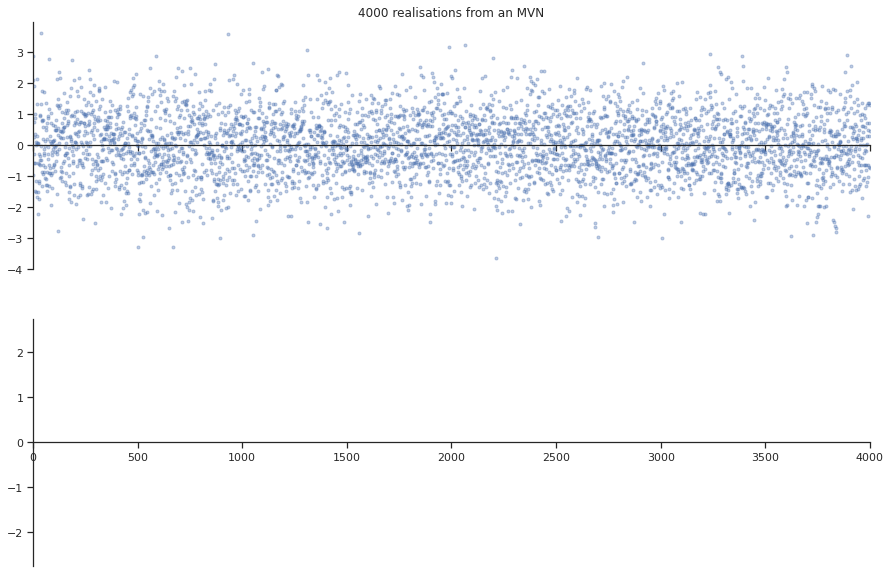

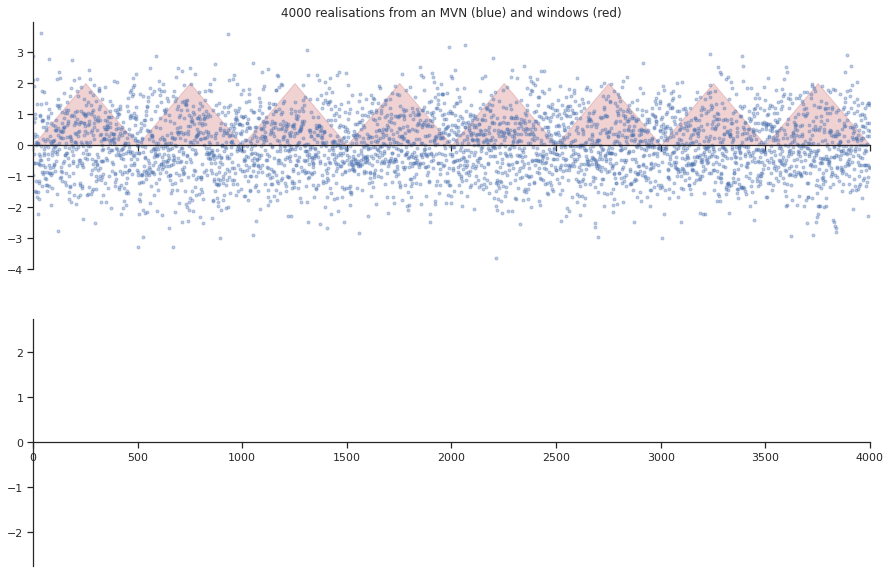

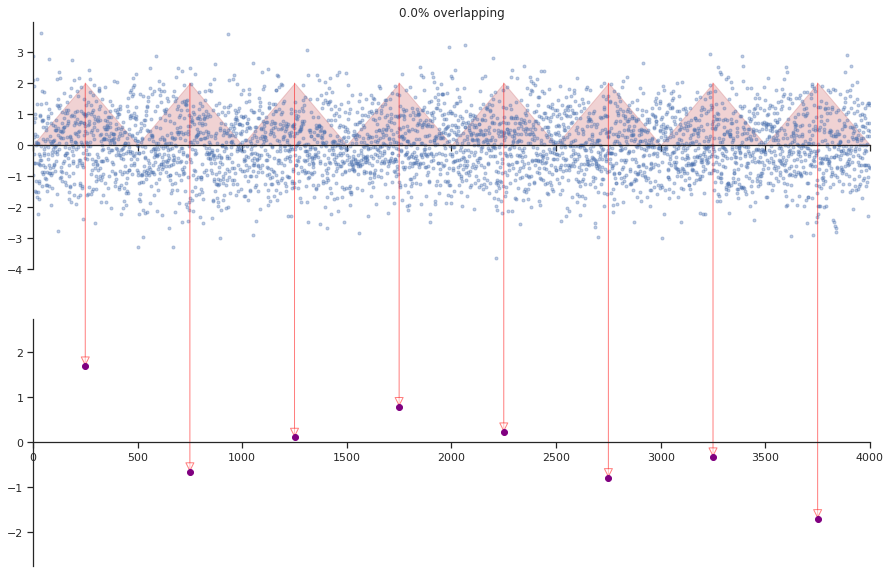

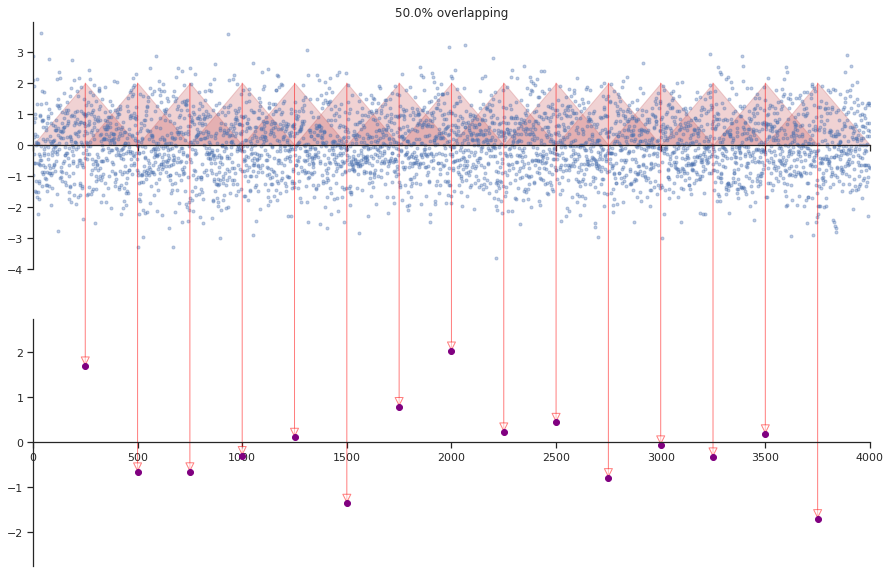

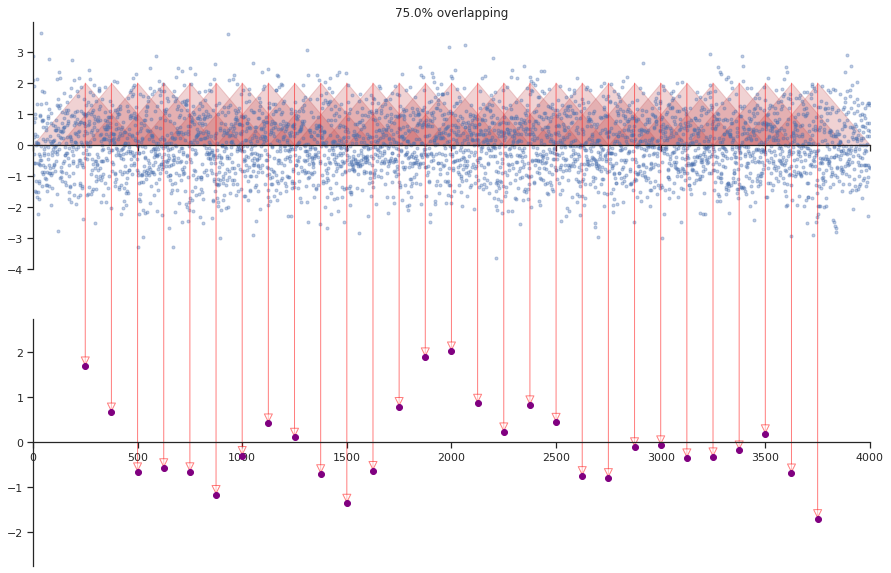

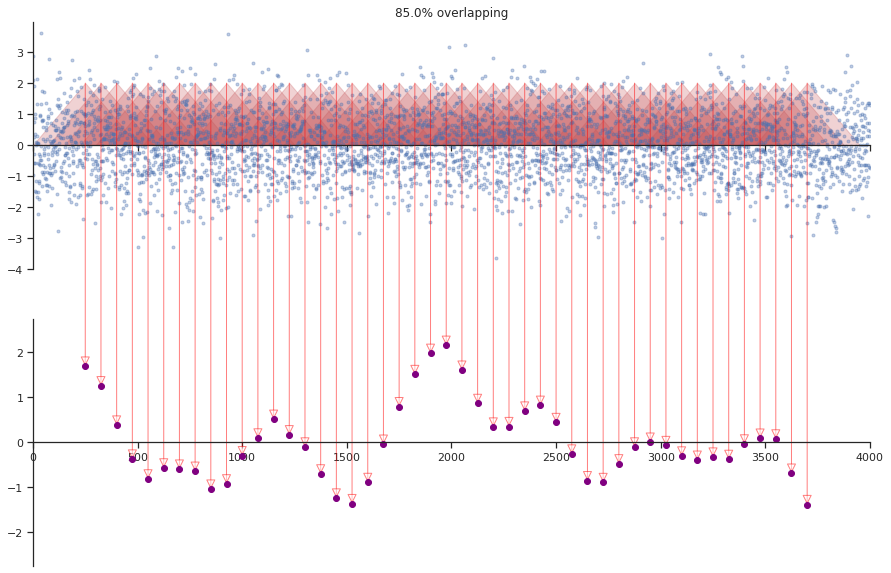

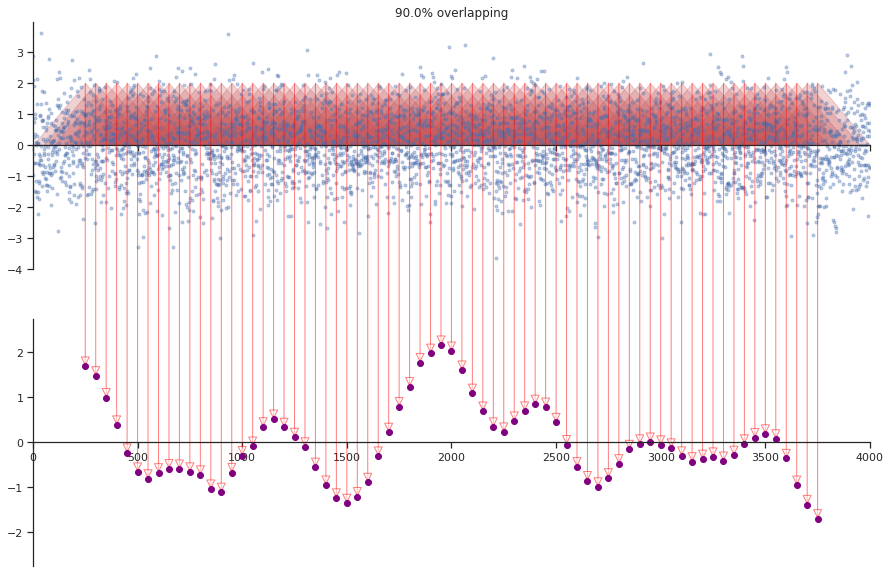

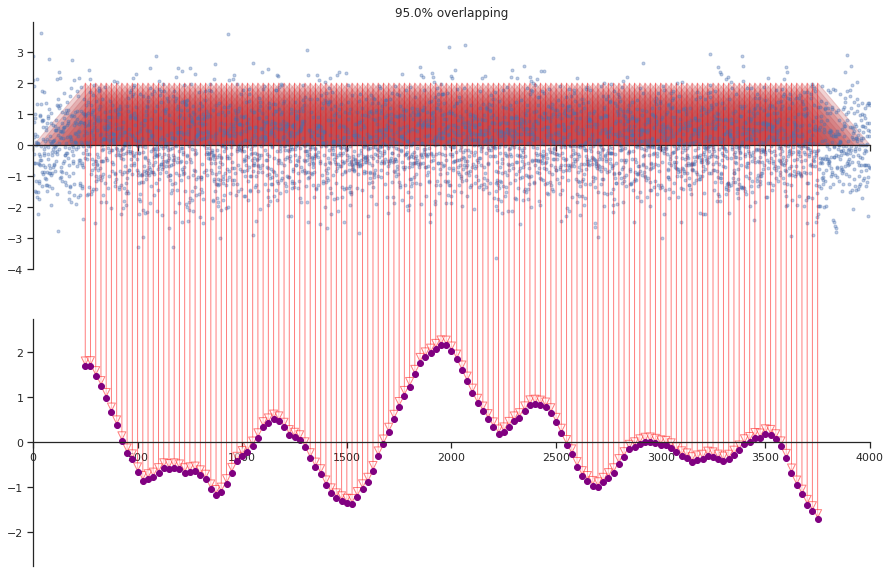

In [8]:
n = 4000
t = np.linspace(0,n,n)
z = np.random.randn(n)
a = np.bartlett(500)
a = a/np.linalg.norm(a)
x = np.convolve(z,a,'valid')
tx = np.linspace(0,n-500,max(n, 500) - min(n, 500) +1 )
ta = np.linspace(0,500,500)

i = 500
two_plots_0(ta,a,t, z, i)
if saving_figs:
        plt.savefig(f'convs-pred_zero.pdf',bbox_inches='tight',pad_inches=0)

two_plots_1(ta,a,t, z, i)
if saving_figs:
        plt.savefig(f'convs-pred_one.pdf',bbox_inches='tight',pad_inches=0)


for i in np.array([500, 250, 125, 75, 50, 25]):
    two_plots(ta,a,t, z, 250+tx[::i], x[::i], i)
    if saving_figs:
        plt.savefig(f'convs-pred{i}.pdf',bbox_inches='tight',pad_inches=0)



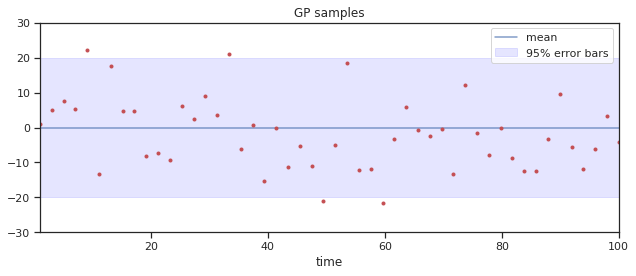

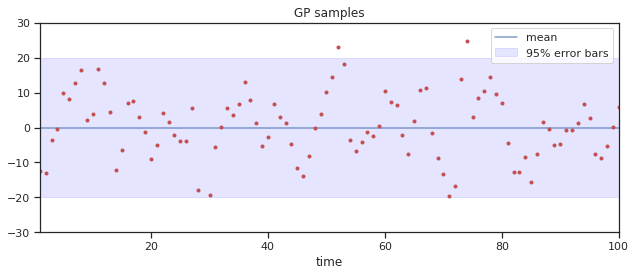

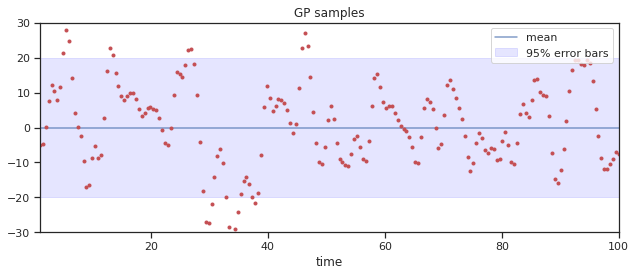

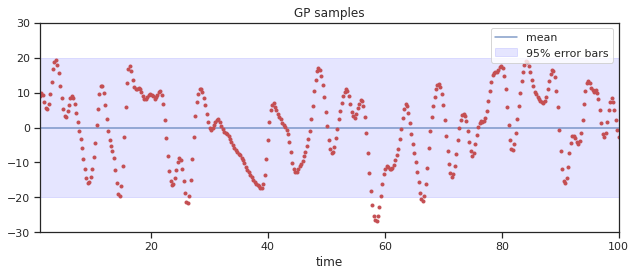

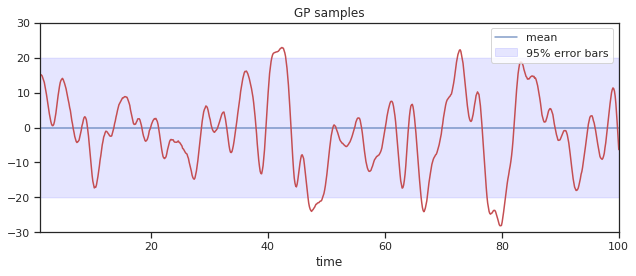

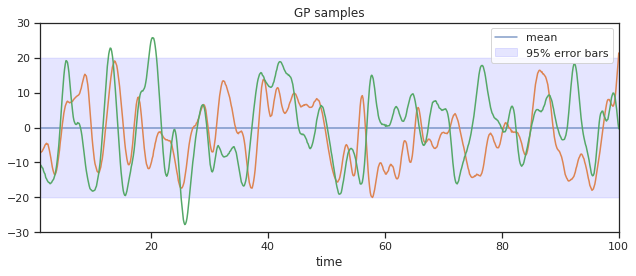

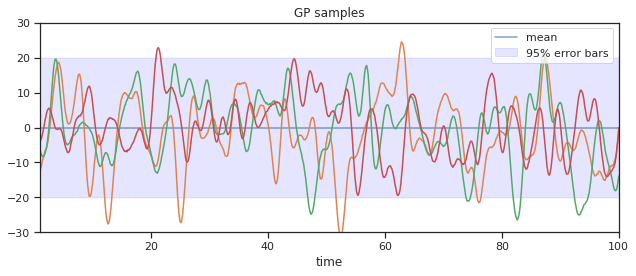

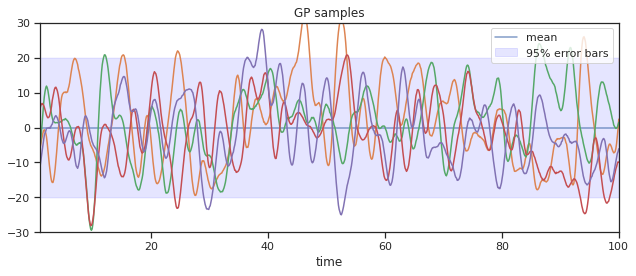

In [9]:
gp = gp_lite()
gp.init_hypers()

for i in np.array([50,100,200,400]):
    gp.compute_posterior(dimension=i)
    gp.sample(how_many=1)
    gp.plot_samples(linestyle = '.', v_axis_lims = 30)
    if saving_figs:
        plt.savefig(f'gp_samples-{i}.pdf',bbox_inches='tight',pad_inches=0)

i = 800
gp.compute_posterior(dimension=i)
gp.sample(how_many=1)
gp.plot_samples(linestyle = '-', v_axis_lims = 30)
if saving_figs:
    plt.savefig('gp_samples-cont-1.pdf',bbox_inches='tight',pad_inches=0)
    
gp.sample(how_many=2) 
gp.plot_samples(linestyle = '-', v_axis_lims = 30)
if saving_figs:
    plt.savefig('gp_samples-cont-2.pdf',bbox_inches='tight',pad_inches=0)

gp.sample(how_many=3) 
gp.plot_samples(linestyle = '-', v_axis_lims = 30)
if saving_figs:
    plt.savefig('gp_samples-cont-3.pdf',bbox_inches='tight',pad_inches=0)
    
gp.sample(how_many=4) 
gp.plot_samples(linestyle = '-', v_axis_lims = 30)
if saving_figs:
    plt.savefig('gp_samples-cont-4.pdf',bbox_inches='tight',pad_inches=0)
    


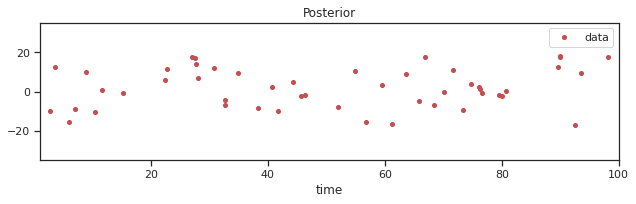

In [10]:
N = 1000
x = 100*np.random.random(N) + 0.1*np.random.randn(N)
y = 20*np.cos(1.5*x)*np.cos(0.1*x) + 0.1*np.random.randn(N)

i = 50
x_sample = x[:i]
y_sample = y[:i]

gp.load(x_sample,y_sample)
gp.plot_data(v_axis_lims = 35)
j = 0
if saving_figs:
    plt.savefig(f'gp_post_samples-{j}.pdf',bbox_inches='tight',pad_inches=0)
    j+=1


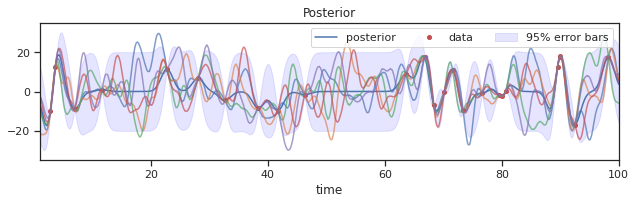

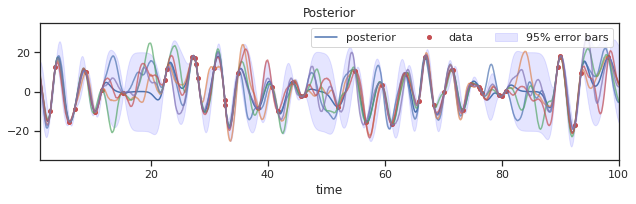

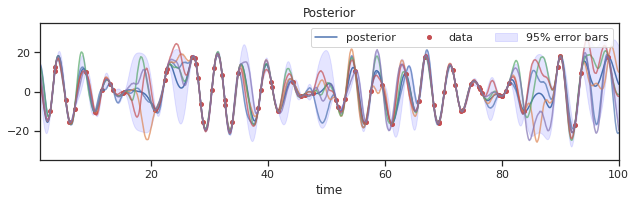

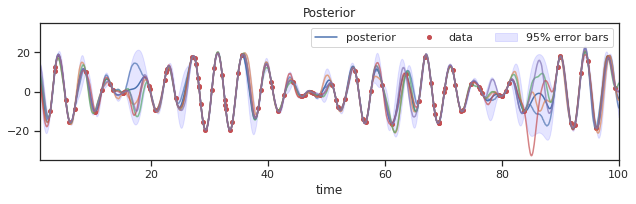

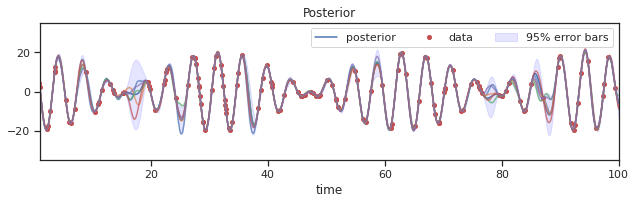

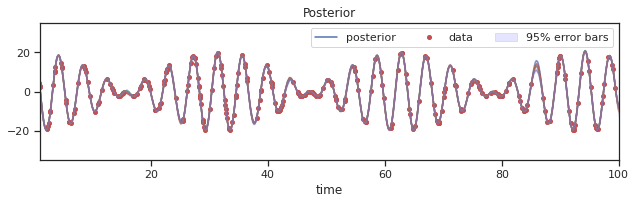

In [11]:
for i in np.array([25,50,75,100, 150, 300]):
    x_sample = x[:i]
    y_sample = y[:i]
    gp.load(x_sample,y_sample)
    gp.compute_posterior(dimension=1000)
    gp.plot_posterior(5,v_axis_lims = 35)
    if saving_figs:
        plt.savefig(f'gp_post_samples-{j}.pdf',bbox_inches='tight',pad_inches=0)
        j+=1

In [12]:
gp.train('show')

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.11139D+02    |proj g|=  1.40940D+02

At iterate    1    f=  2.55342D+02    |proj g|=  8.35349D+01

At iterate    2    f=  2.14030D+02    |proj g|=  1.43238D+02

At iterate    3    f=  1.81499D+02    |proj g|=  4.56706D+01


 This problem is unconstrained.



At iterate    4    f=  1.53248D+02    |proj g|=  8.92002D+01

At iterate    5    f=  1.04903D+02    |proj g|=  1.28272D+02

At iterate    6    f=  9.20704D+01    |proj g|=  1.40297D+02

At iterate    7    f=  7.45595D+01    |proj g|=  1.32593D+02

At iterate    8    f= -2.59776D+01    |proj g|=  1.55051D+02

At iterate    9    f= -3.20887D+01    |proj g|=  4.68983D+02

At iterate   10    f= -6.35404D+01    |proj g|=  1.11357D+02

At iterate   11    f= -8.89609D+01    |proj g|=  5.84057D+01

At iterate   12    f= -1.15155D+02    |proj g|=  4.65528D+01

At iterate   13    f= -1.23089D+02    |proj g|=  9.31038D+01

At iterate   14    f= -1.26915D+02    |proj g|=  2.59284D+02

At iterate   15    f= -1.34539D+02    |proj g|=  4.40882D+02

At iterate   16    f= -1.36870D+02    |proj g|=  1.14010D+02

At iterate   17    f= -1.37307D+02    |proj g|=  1.80568D+01

At iterate   18    f= -1.37337D+02    |proj g|=  3.06631D+01

At iterate   19    f= -1.37369D+02    |proj g|=  1.29046D+01

At iter

In [14]:
gp.init_hypers('manual', (1,2,3,4))
gp.show_hypers()

gamma: 2, i.e., lengthscale = 0.5
sigma: 1
sigma_n: 4
mu: 3
